#Oasis Infobyte Internship – Task 2

**COVID-19 Impact Analysis**

**Domain:** Data Science

**Internship Platform:** Oasis Infobyte

# Analyzing Unemployment in India (2020)

This project explores unemployment trends, employment patterns, and labour participation rates across Indian states for the year 2020.

The dataset includes:
- States
- Date
- Frequency
- Estimated Unemployment Rate (%)
- Estimated Employed
- Estimated Labour Participation Rate (%)
- Region
- Longitude & Latitude



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.zip')


data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
                'Estimated Labour Participation Rate', 'Region', 'longitude','latitude']

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


## Dataset Overview

- Number of rows and columns
- Data types
- Missing values
- Basic statistical summary

In [ ]:
print("Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
data.describe().T

Shape: (267, 9)

Data Types:
 States                                         object
Date                                   datetime64[ns]
Frequency                                      object
Estimated Unemployment Rate                   float64
Estimated Employed                              int64
Estimated Labour Participation Rate           float64
Region                                         object
longitude                                     float64
latitude                                      float64
dtype: object

Missing Values:
 States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64


,count,mean,min,25%,50%,75%,max,std
Date,267,2020-06-16 09:15:30.337078528,2020-01-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-08-31 00:00:00,2020-10-31 00:00:00,NaN
Estimated Unemployment Rate,267.0,12.236929,0.5,4.845,9.65,16.755,75.85,10.803283
Estimated Employed,267.0,13962105.722846,117542.0,2838930.5,9732417.0,21878686.0,59433759.0,13366318.359733
Estimated Labour Participation Rate,267.0,41.681573,16.77,37.265,40.39,44.055,69.69,7.845419
longitude,267.0,22.826048,10.8505,18.1124,23.6102,27.2784,33.7782,6.270731
latitude,267.0,80.532425,71.1924,76.0856,79.0193,85.2799,92.9376,5.831738


## Feature Correlations

Examination of relationships between unemployment rate, employment, labour participation, and geographical coordinates using a heatmap.

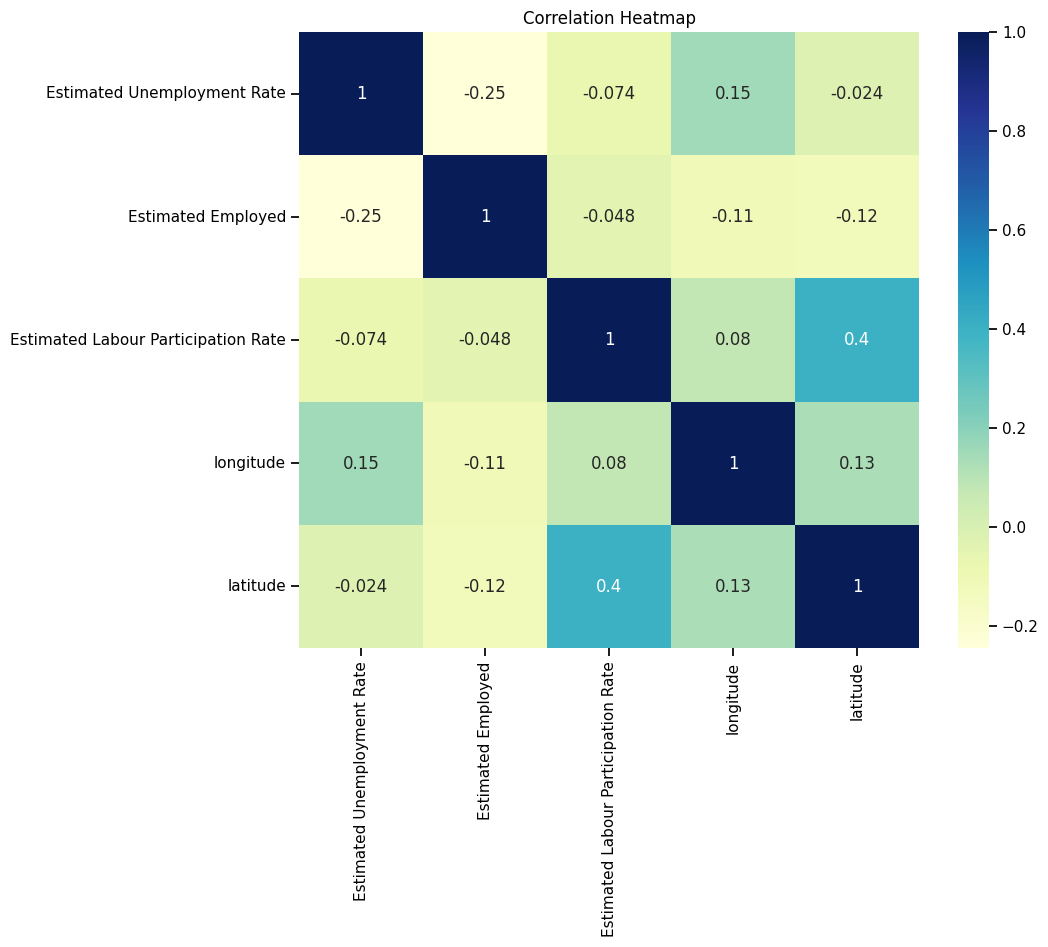

In [ ]:
heat_map = data[['Estimated Unemployment Rate', 'Estimated Employed',
                 'Estimated Labour Participation Rate', 'longitude', 'latitude']].corr()

plt.figure(figsize=(10, 8))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_map, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

## Unemployment Rate by State

Visualizing which states have higher unemployment rates.

In [ ]:
fig = px.bar(data, x="States", y="Estimated Unemployment Rate", color="States",
             title="Unemployment Rate by State", template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

## Pairwise Relationships

Pairplots help understand relationships between unemployment rate, employment, and labour participation by region.

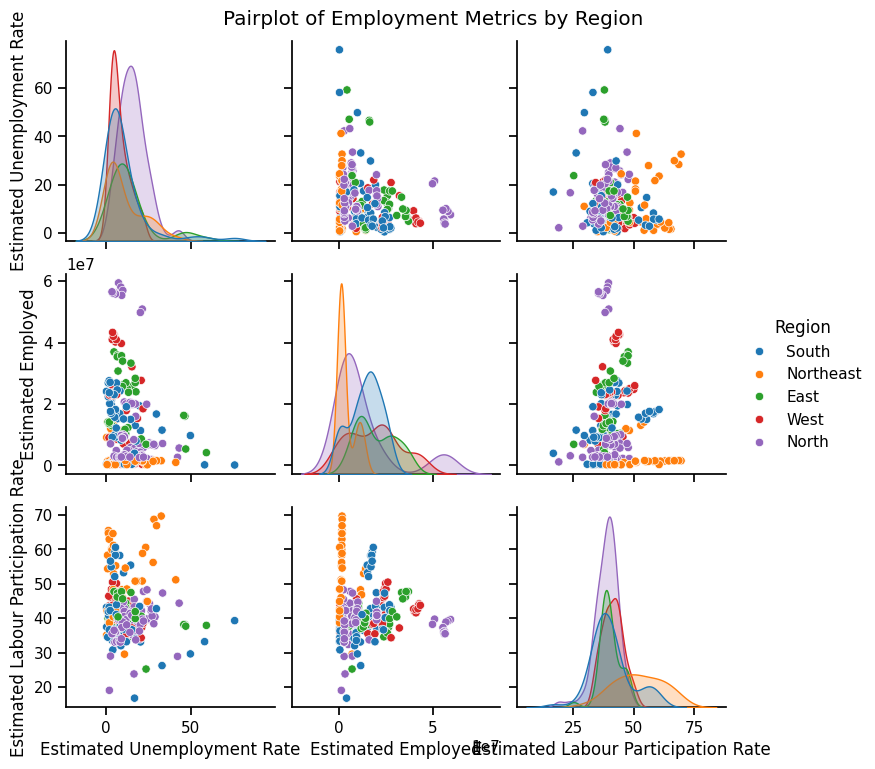

In [ ]:
unique_regions = data['Region'].unique()
region_colors = {region: sns.color_palette()[i] for i, region in enumerate(unique_regions)}

sns.pairplot(data, vars=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'],
             hue='Region', palette=region_colors)
plt.suptitle("Pairplot of Employment Metrics by Region", y=1.02)
plt.show()

## Unemployment Rate Over Time by Region

Encoding regions and plotting unemployment trends over time.

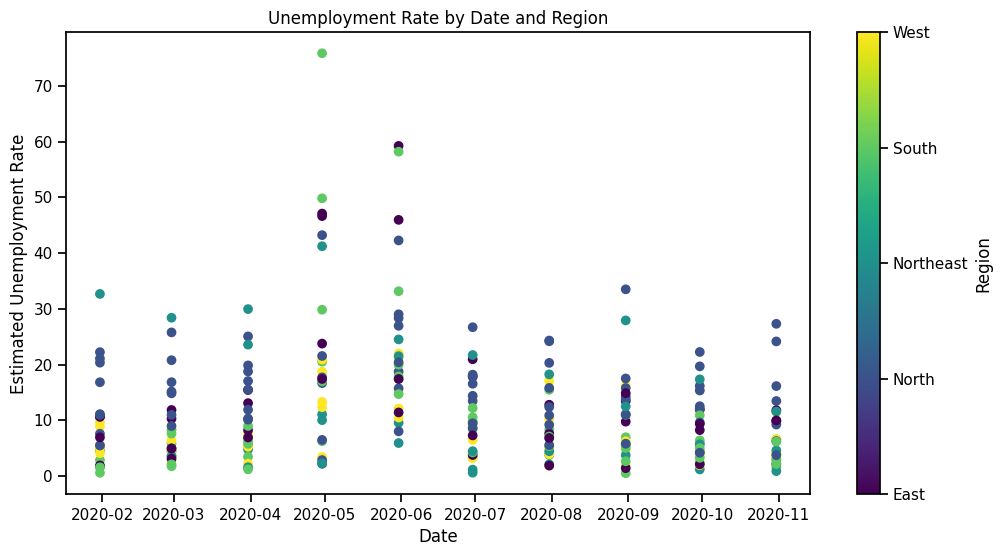

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Region_encoded'] = label_encoder.fit_transform(data['Region'])
region_names = label_encoder.classes_

plt.figure(figsize=(12,6))
scatter = plt.scatter(data['Date'], data['Estimated Unemployment Rate'],
                      c=data['Region_encoded'], cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Unemployment Rate by Date and Region')
cbar = plt.colorbar(scatter, ticks=range(len(region_names)))
cbar.set_ticklabels(region_names)
cbar.set_label('Region')
plt.show()

## Unemployment Rate & Labour Participation Rate by States

Visualizing both metrics together for each state.

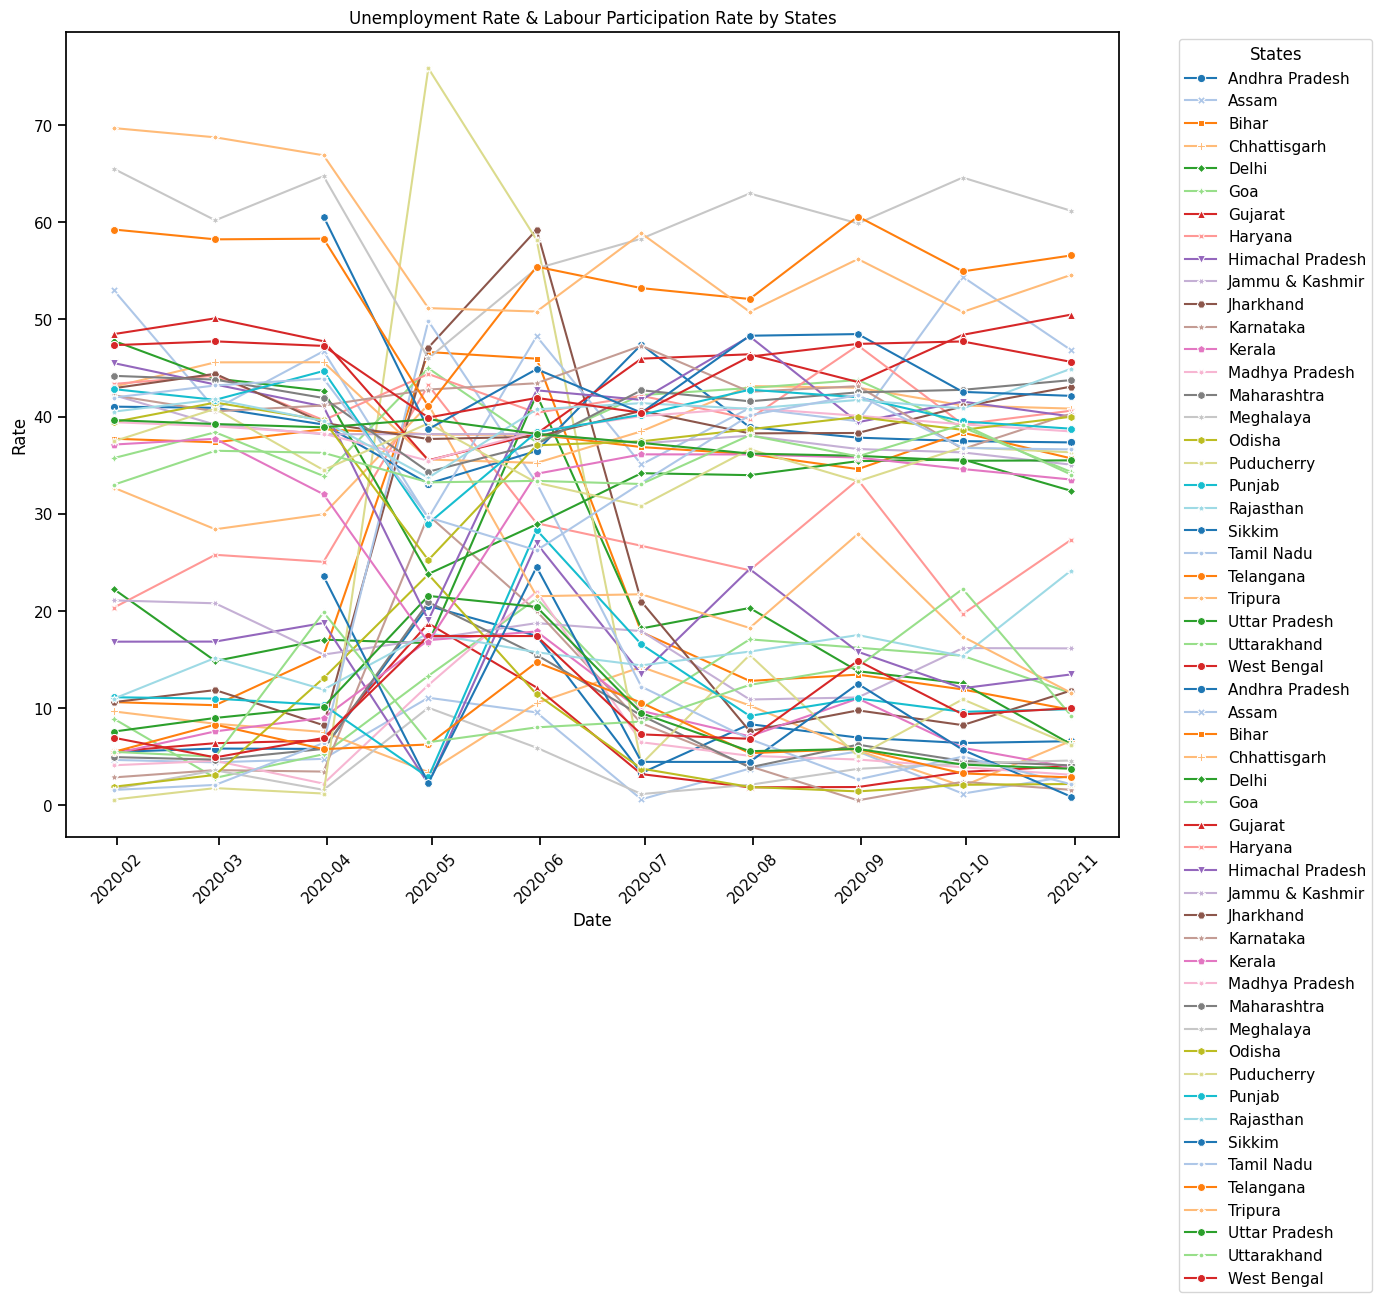

In [ ]:
plt.figure(figsize=(14,12))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate', hue='States', style='States',
             markers=True, dashes=False, palette='tab20')
sns.lineplot(data=data, x='Date', y='Estimated Labour Participation Rate', hue='States', style='States',
             markers=True, dashes=False, palette='tab20')
plt.title('Unemployment Rate & Labour Participation Rate by States')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend(title='States', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Animated Labour Participation Rate by State

Shows how labour participation rate changes over time in different states.

In [ ]:
fig = px.histogram(data, x='States', y='Estimated Labour Participation Rate', color='Region',
                   animation_frame='Date', template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

## Final Summary: Sunburst Chart of Unemployment Rate

Shows contribution of each state within its region to total unemployment.

In [ ]:
unemployment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

## Conclusion

1. **High Unemployment:** Some states, particularly in the South during early 2020, had high unemployment peaks due to the pandemic lockdowns.
2. **Labour Participation:** States with higher employment tend to have higher labour participation rates.
3. **Regional Patterns:** Southern and Northern regions show more stable trends, whereas Eastern and Central regions experienced greater fluctuations.
4. **Policy Implications:** Understanding these trends can help policymakers target employment programs and labour market interventions more effectively.

This analysis provides a clear visual and statistical understanding of unemployment and labour participation in India for 2020.